In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading data

In [2]:
hr_data=pd.read_csv(r'decision tree/WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### Analysing data

In [66]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
hr_data.shape

(1470, 35)

<AxesSubplot:>

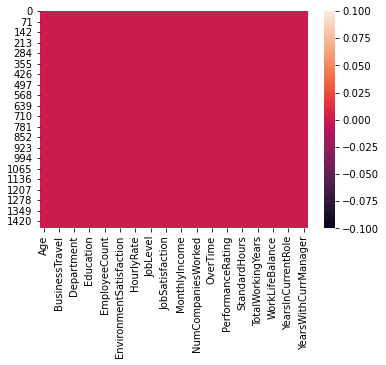

In [6]:
#checking for null values
import seaborn as sb
sb.heatmap(hr_data.isna())

No null values present

<AxesSubplot:>

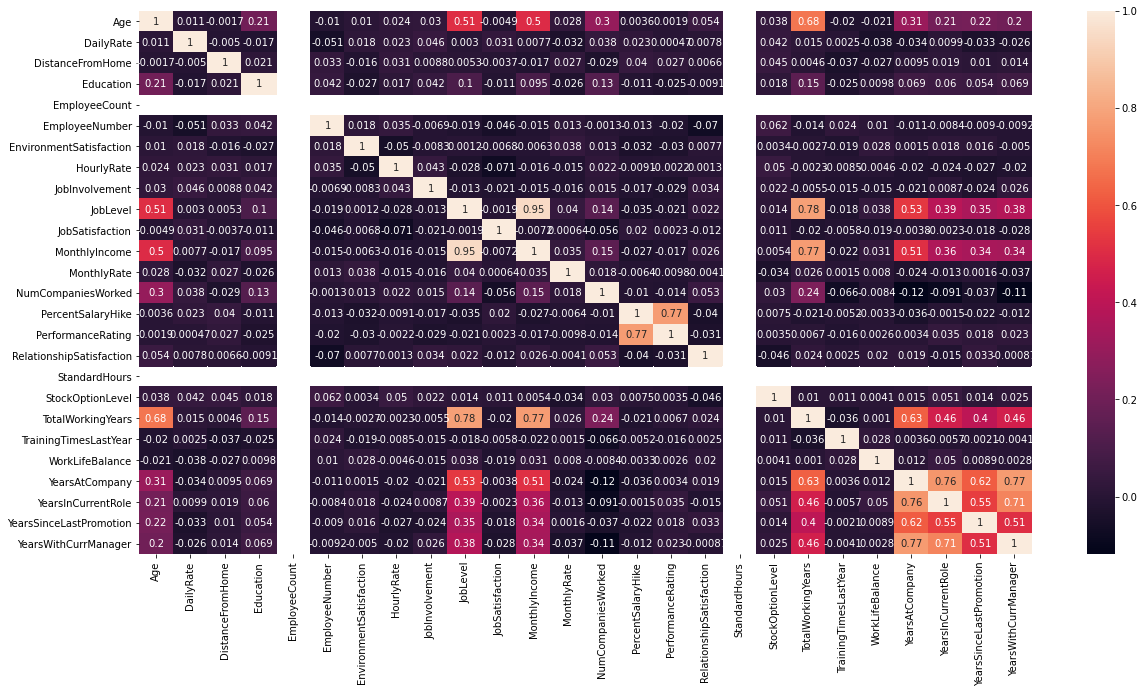

In [7]:
plt.figure(figsize=(20,10))
sb.heatmap(hr_data.corr(),annot=True)

We can observe that some columns have very HIGH MULTICOLLENEARITY ISSUE which may affect model accuracy.Hence removing one of the columns from each pair which is having multicollenearity issue.

In [8]:
# removing multicollinearity issue
HR_data=hr_data.copy()
colmns=['StandardHours','EmployeeCount','EmployeeNumber','TotalWorkingYears','JobLevel','YearsInCurrentRole','YearsWithCurrManager','PerformanceRating','YearsSinceLastPromotion']
HR_data.drop(colmns,axis=1,inplace=True)

<AxesSubplot:>

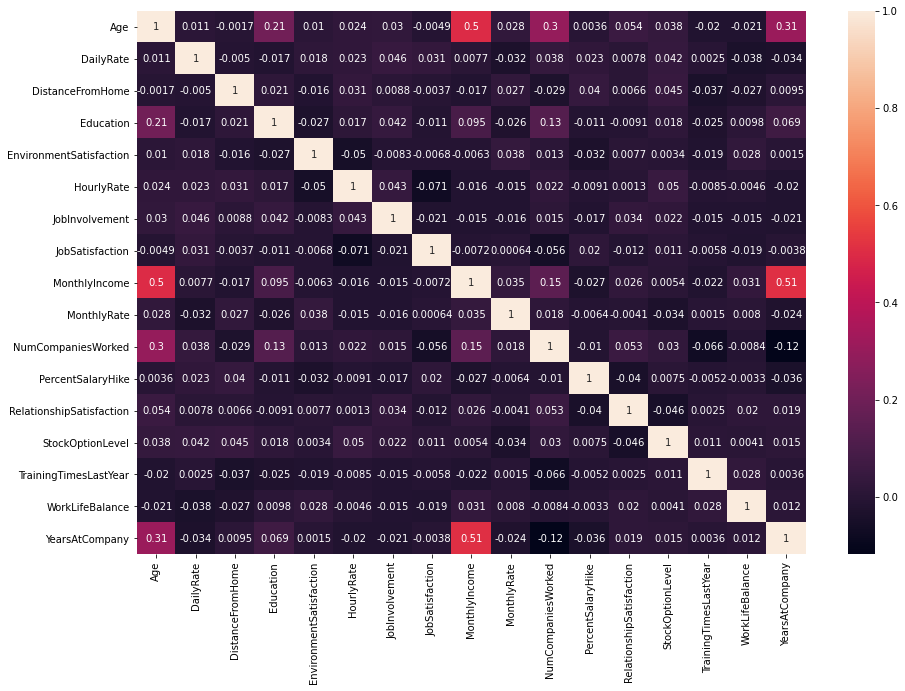

In [9]:
plt.figure(figsize=(15,10))
sb.heatmap(HR_data.corr(),annot=True)

Observation-- Multicollenearity issue removed and all columns now are almost independent

<AxesSubplot:xlabel='Attrition', ylabel='count'>

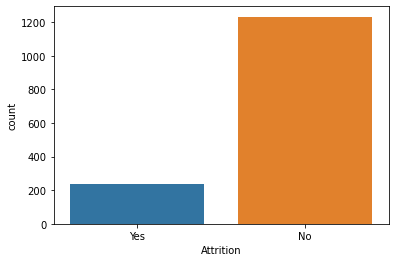

In [10]:
sb.countplot(x='Attrition',data=hr_data)

Approximately 20% attrition is observed

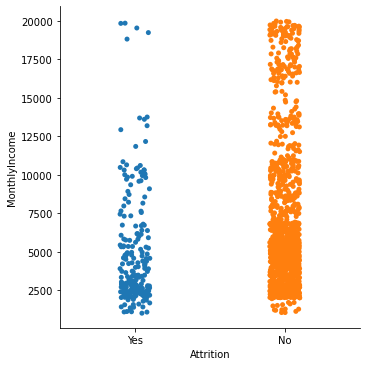

In [11]:
sb.catplot(x='Attrition',y='MonthlyIncome',data=hr_data)

Most Attrition is observed with employees having low monthly salary

In [12]:
hr_data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

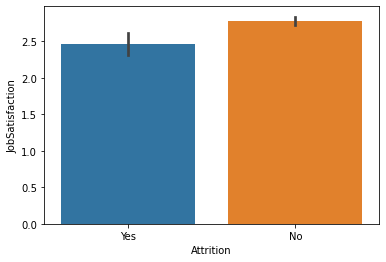

In [13]:
sb.barplot(x='Attrition',y='JobSatisfaction',data=hr_data)

All attrition happened with employees having job satisfaction lower than 2.5

<AxesSubplot:ylabel='Frequency'>

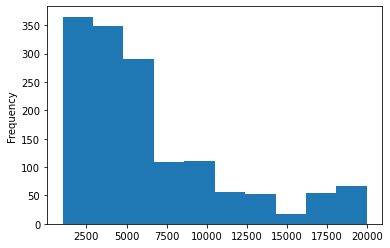

In [14]:
hr_data['MonthlyIncome'].plot.hist()

Monthly salary of most employees ranges from 2500 to 10000

<AxesSubplot:ylabel='Frequency'>

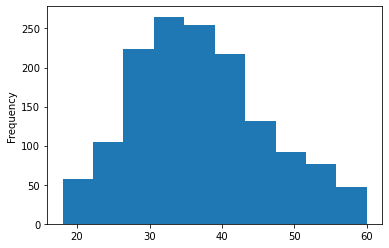

In [15]:
hr_data['Age'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

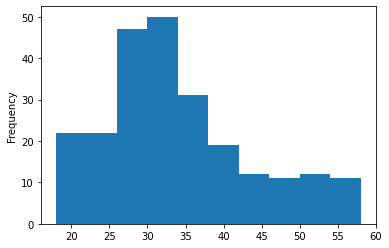

In [16]:
#cheking age distribution of employees who suffered attrition
hr_data[(hr_data['Attrition']=='Yes')]['Age'].plot.hist()

Most Attrition happened with employees in age range 20 to 40

<AxesSubplot:ylabel='Frequency'>

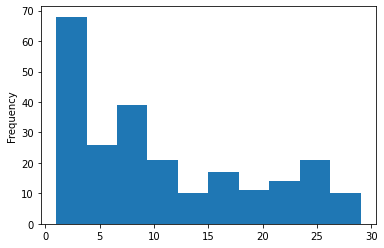

In [17]:
#cheking distance from home distribution of employees who suffered attrition
hr_data[(hr_data['Attrition']=='Yes')]['DistanceFromHome'].plot.hist()

In [18]:
#taking count of gender
HR_data.groupby('Gender').count()['Age']

Gender
Female    588
Male      882
Name: Age, dtype: int64

Ratio of Male is greater than Female

<AxesSubplot:xlabel='Attrition', ylabel='count'>

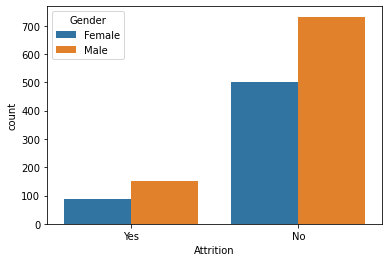

In [19]:
sb.countplot(x='Attrition',hue='Gender',data=HR_data)

Male attrition is higher but we conclude that Gender makes no impact on Attrition since Male ratio is higher than Female as seen in the count of Gender

<AxesSubplot:xlabel='Department', ylabel='count'>

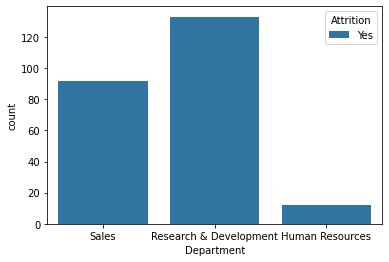

In [20]:
# checking if department has any impact on Attrition
sb.countplot(x='Department',hue='Attrition',data=hr_data[hr_data['Attrition']=='Yes'])

Highest Attrition is from R&D department and least is from HR department

<AxesSubplot:ylabel='Frequency'>

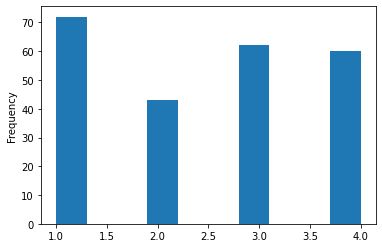

In [21]:
#chceking if EnvironmentSatisfaction makes any impact on Attrition
hr_data[(hr_data['Attrition']=='Yes')]['EnvironmentSatisfaction'].plot.hist()

Most Attrition happened with satisfaction level 1

<AxesSubplot:xlabel='Attrition', ylabel='count'>

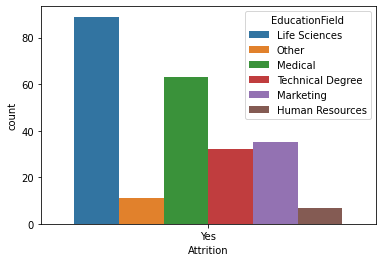

In [22]:
#checking impact of EducationField on Attrition
sb.countplot(x='Attrition',hue='EducationField',data=hr_data[hr_data['Attrition']=='Yes'])

Most Attrition happened from LS and Medical domain

<AxesSubplot:xlabel='Attrition', ylabel='count'>

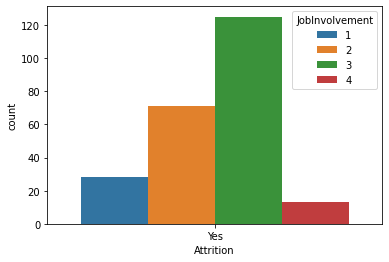

In [23]:
#checking impact of JobInvolvement on Attrition
sb.countplot(x='Attrition',hue='JobInvolvement',data=hr_data[hr_data['Attrition']=='Yes'])

Most Attrition happened with Jobinvolvement level 3

<AxesSubplot:xlabel='Attrition', ylabel='count'>

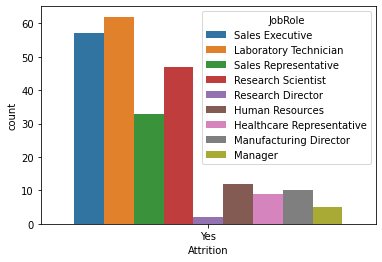

In [24]:
#checking impact of JobRole on Attrition
sb.countplot(x='Attrition',hue='JobRole',data=hr_data[hr_data['Attrition']=='Yes'])

Lab Technician,Sales executive,Research scientist were attrited most

<AxesSubplot:xlabel='Attrition', ylabel='count'>

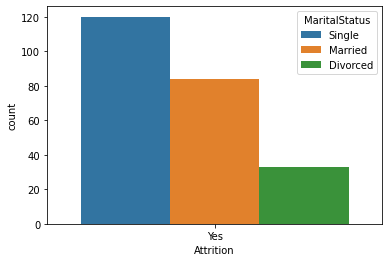

In [25]:
#checking impact of MaritalStatus on Attrition
sb.countplot(x='Attrition',hue='MaritalStatus',data=hr_data[hr_data['Attrition']=='Yes'])

Single employees contributed most in Attriton count

<AxesSubplot:ylabel='Frequency'>

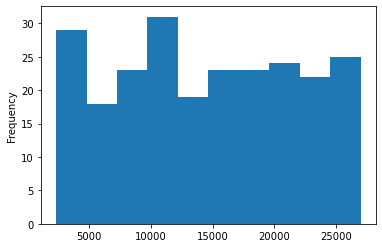

In [26]:
#cheking distance from home distribution of employees who suffered attrition
hr_data[(hr_data['Attrition']=='Yes')]['MonthlyRate'].plot.hist()

Monthly rate seems to have no impact on Attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

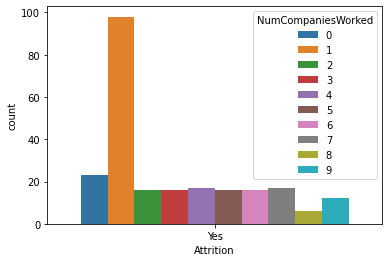

In [27]:
#checking impact of No of companies worked on Attrition
sb.countplot(x='Attrition',hue='NumCompaniesWorked',data=hr_data[hr_data['Attrition']=='Yes'])

Highest Attrition observed with employees who has left one company in past

In [28]:
#All emloyees are over 18 hence dropping this column
HR_data['Over18'].unique()

array(['Y'], dtype=object)

In [29]:
HR_data.drop(['Over18'],axis=1,inplace=True)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

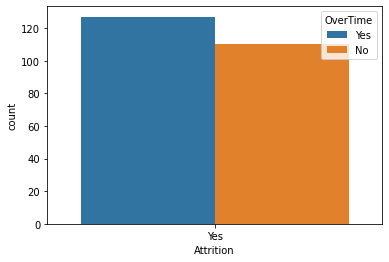

In [30]:
#checking impact of Overtime worked on Attrition
sb.countplot(x='Attrition',hue='OverTime',data=hr_data[hr_data['Attrition']=='Yes'])

OverTime seems less correlated to Attrition since both counts are almost same

array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

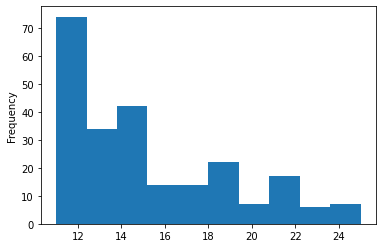

In [31]:
#cheking distribution of percentsalary hike
hr_data[(hr_data['Attrition']=='Yes')]['PercentSalaryHike'].plot.hist(subplots=True)

Employees with less salary hike (12 to 15) suffered mostly with Attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

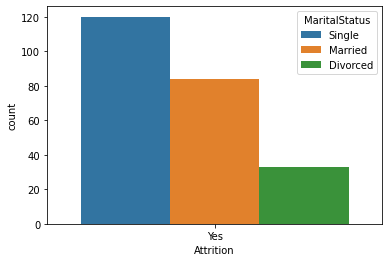

In [32]:
#checking impact of MaritalStatus worked on Attrition
sb.countplot(x='Attrition',hue='MaritalStatus',data=hr_data[hr_data['Attrition']=='Yes'])

Single employees contributes most in Attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

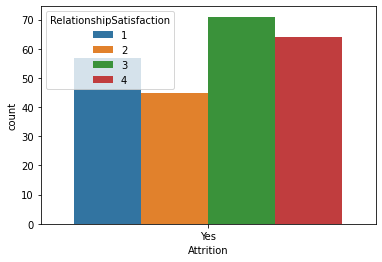

In [33]:
#checking impact of RelationshipSatisfaction worked on Attrition
sb.countplot(x='Attrition',hue='RelationshipSatisfaction',data=hr_data[hr_data['Attrition']=='Yes'])

Relationship satisfaction also seems to be less correlated with Attrition since all levels has enough attrition

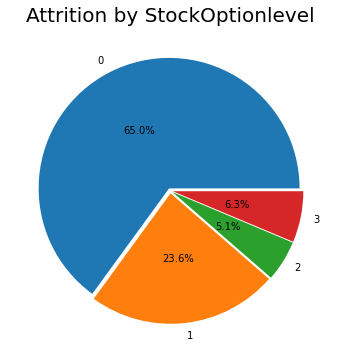

In [34]:
#checking impact of StockOptionLevel worked on Attrition
pie, ax = plt.subplots(figsize=[10,6])
labels =HR_data[HR_data['Attrition']=='Yes'].groupby('StockOptionLevel').count()['Age'].keys()
plt.pie(x=HR_data[HR_data['Attrition']=='Yes'].groupby('StockOptionLevel').count()['Age'], autopct="%.1f%%", explode=[0.02]*4, labels=labels, pctdistance=0.5)
plt.title("Attrition by StockOptionlevel", fontsize=20);

Stock option level 0 had highest attrition of 65%

<AxesSubplot:xlabel='Attrition', ylabel='count'>

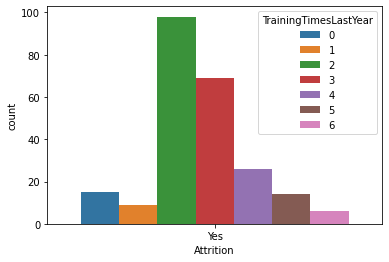

In [35]:
#checking impact of TrainingTimesLastYear worked on Attrition
sb.countplot(x='Attrition',hue='TrainingTimesLastYear',data=hr_data[hr_data['Attrition']=='Yes'])

most employess with TrainingTimesLastYear 2,3 suffered most Attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

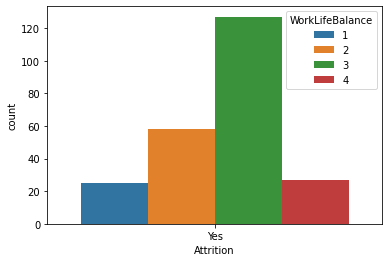

In [36]:
#checking impact of WorkLifeBalance worked on Attrition
sb.countplot(x='Attrition',hue='WorkLifeBalance',data=hr_data[hr_data['Attrition']=='Yes'])

Employees having Worklife Balance of 3 suffered most Attrition

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

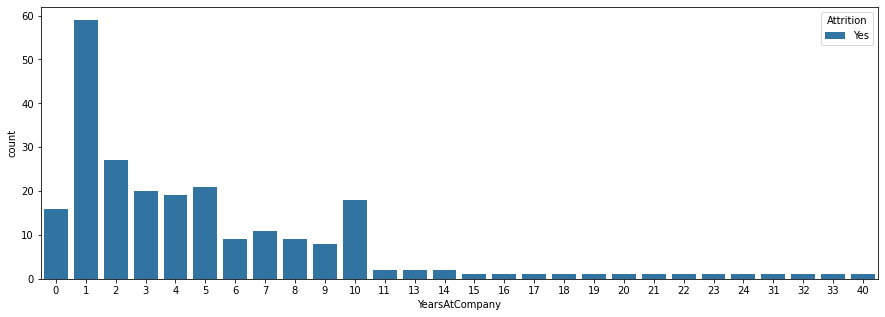

In [37]:
#checking impact of years stayed by employees on Attriton
plt.figure(figsize=(15,5))
sb.countplot(x='YearsAtCompany',hue='Attrition',data=hr_data[hr_data['Attrition']=='Yes'])

Most Atrrition happened with employees who worked for 1 and 2 years only

In [38]:
HR_data.drop(['RelationshipSatisfaction','OverTime'],inplace=True,axis=1)

In [39]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   DailyRate                1470 non-null   int64 
 4   Department               1470 non-null   object
 5   DistanceFromHome         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   EducationField           1470 non-null   object
 8   EnvironmentSatisfaction  1470 non-null   int64 
 9   Gender                   1470 non-null   object
 10  HourlyRate               1470 non-null   int64 
 11  JobInvolvement           1470 non-null   int64 
 12  JobRole                  1470 non-null   object
 13  JobSatisfaction          1470 non-null   int64 
 14  MaritalStatus            1470 non-null  

### Preprocessing the string data

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Attrition','MonthlyRate','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']:
    le.fit(HR_data[i])
    HR_data[i]=le.transform(HR_data[i])

### Dealing with Outliers:

In [41]:
from scipy.stats import zscore
z=abs(zscore(HR_data))
HRdata_no_outliers=HR_data[(z<3).all(axis=1)]
print(HR_data.shape)
print(HRdata_no_outliers.shape,'\n',HR_data.shape[0]-HRdata_no_outliers.shape[0],' rows removed as outliers')

(1470, 23)
(1445, 23) 
 25  rows removed as outliers


<AxesSubplot:>

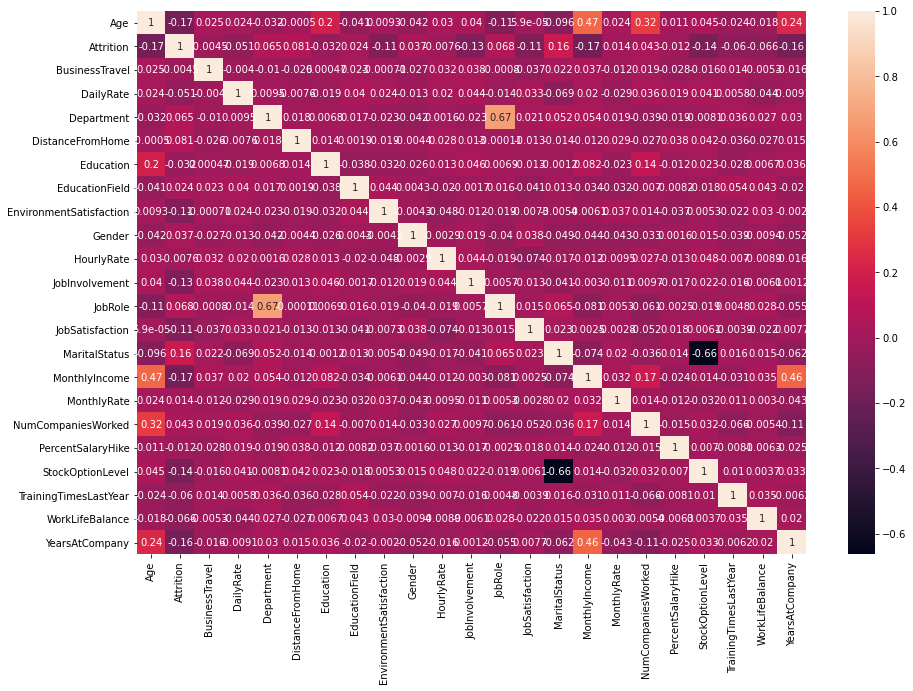

In [42]:
plt.figure(figsize=(15,10))
sb.heatmap(HRdata_no_outliers.corr(),annot=True)

In [43]:
HR_data.drop('JobRole',axis=1,inplace=True)

In [44]:
HR_data.skew()

Age                        0.413286
Attrition                  1.844366
BusinessTravel            -1.439006
DailyRate                 -0.003519
Department                 0.172231
DistanceFromHome           0.958118
Education                 -0.289681
EducationField             0.550371
EnvironmentSatisfaction   -0.321654
Gender                    -0.408665
HourlyRate                -0.032311
JobInvolvement            -0.498419
JobSatisfaction           -0.329672
MaritalStatus             -0.152175
MonthlyIncome              1.369817
MonthlyRate                0.012315
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
StockOptionLevel           0.968980
TrainingTimesLastYear      0.553124
WorkLifeBalance           -0.552480
YearsAtCompany             1.764529
dtype: float64

In [45]:
HRdata_no_outliers.skew()

Age                        0.432706
Attrition                  1.844186
BusinessTravel            -1.438804
DailyRate                 -0.011501
Department                 0.179163
DistanceFromHome           0.956039
Education                 -0.293210
EducationField             0.550170
EnvironmentSatisfaction   -0.320300
Gender                    -0.402786
HourlyRate                -0.032636
JobInvolvement            -0.500871
JobRole                   -0.374534
JobSatisfaction           -0.334707
MaritalStatus             -0.155138
MonthlyIncome              1.427644
MonthlyRate                0.017769
NumCompaniesWorked         1.020254
PercentSalaryHike          0.815184
StockOptionLevel           0.964859
TrainingTimesLastYear      0.554107
WorkLifeBalance           -0.550504
YearsAtCompany             1.254208
dtype: float64

In [46]:
HRdata_no_outliers.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,36.663668,0.161246,1.607612,804.921107,1.260900,9.202768,2.903806,2.248443,2.721799,0.598616,...,2.732180,1.098962,6331.112111,708.050519,2.706574,15.222837,0.796540,2.795848,2.762630,6.587543
std,8.982306,0.367885,0.664971,403.685471,0.526737,8.096098,1.019759,1.334034,1.092078,0.490348,...,1.102551,0.730636,4538.402515,410.482200,2.500912,3.658391,0.856854,1.291024,0.705922,5.247884
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1009.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,1.000000,467.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,2.000000,1.000000,2889.000000,354.000000,1.000000,12.000000,0.000000,2.000000,2.000000,3.000000
50%,35.000000,0.000000,2.000000,805.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,1.000000,4859.000000,704.000000,2.000000,14.000000,1.000000,3.000000,3.000000,5.000000
75%,42.000000,0.000000,2.000000,1162.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,...,4.000000,2.000000,7945.000000,1062.000000,4.000000,18.000000,1.000000,3.000000,3.000000,9.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,2.000000,19973.000000,1426.000000,9.000000,25.000000,3.000000,6.000000,4.000000,25.000000


Age                           AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Attrition                  AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
BusinessTravel             AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
DailyRate                  AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Department                 AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
DistanceFromHome           AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
Education                  AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
EducationField             AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
EnvironmentSatisfaction       AxesSubplot(0.125,0.391471;0.0824468x0.222059)
Gender                     AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
HourlyRate                 AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
JobInvolvement             AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
JobRole                    AxesSubplot(0.520745,0.391471;0.0824468x0.222059)

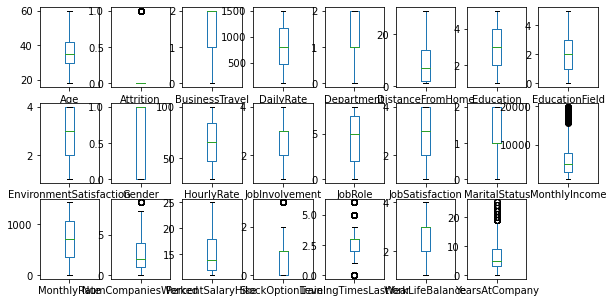

In [47]:
HRdata_no_outliers.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,5))

### Dealing with skewness

In [48]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
for i in HRdata_no_outliers.columns:
    if((abs(HRdata_no_outliers[i].skew())>0.55) & (i!='Attrition')):
        HRdata_no_outliers.loc[:,[i]]=PowerTransformer().fit_transform((HRdata_no_outliers.loc[:,[i]]))

In [49]:
HRdata_no_outliers.skew()

Age                        0.432706
Attrition                  1.844186
BusinessTravel            -0.969491
DailyRate                 -0.011501
Department                 0.179163
DistanceFromHome          -0.009098
Education                 -0.293210
EducationField            -0.008631
EnvironmentSatisfaction   -0.320300
Gender                    -0.402786
HourlyRate                -0.032636
JobInvolvement            -0.500871
JobRole                   -0.374534
JobSatisfaction           -0.334707
MaritalStatus             -0.155138
MonthlyIncome              0.031094
MonthlyRate                0.017769
NumCompaniesWorked         0.013525
PercentSalaryHike          0.115520
StockOptionLevel           0.089257
TrainingTimesLastYear      0.058465
WorkLifeBalance           -0.011882
YearsAtCompany            -0.021967
dtype: float64

Most Skewness is handled 

In [65]:
HRdata_no_outliers.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
0,41,1,0.635755,1102,2,-1.495251,2,-0.958465,2,0,...,4,2,0.319737,999,1.619260,-1.494025,-1.085481,-2.569314,-2.147950,0.162881
1,49,0,-1.392821,279,1,0.239333,1,-0.958465,3,1,...,2,1,0.083269,1328,-0.579095,1.679002,0.547614,0.219666,0.275164,0.833532
2,37,1,0.635755,1373,1,-1.034386,2,1.245443,4,1,...,3,2,-1.443121,18,1.266965,0.195936,-1.085481,0.219666,0.275164,-2.175607
3,33,0,-1.392821,1392,1,-0.704402,4,-0.958465,4,0,...,3,1,-0.847567,1228,-0.579095,-1.494025,-1.085481,0.219666,0.275164,0.529040
4,27,0,0.635755,591,1,-1.034386,1,0.695895,1,1,...,2,1,-0.547297,846,1.765225,-0.954366,0.547614,0.219666,0.275164,-0.956461


### Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler  
X_mmscaled=MinMaxScaler().fit_transform(HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]])
X_sscaled=StandardScaler().fit_transform(HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]])
Y=HRdata_no_outliers.iloc[:,1]
x=HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]]
y=HRdata_no_outliers.iloc[:,1]

#### Decision Tree Practice

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [74]:
HRdata_no_outliers.shape

(1445, 23)

In [75]:
train_x, test_x , train_y, test_y=train_test_split(X_sscaled, Y , test_size=0.2 , random_state=42)

In [76]:
print(train_x.shape, train_y.shape , test_x.shape, test_y.shape)

(1156, 22) (1156,) (289, 22) (289,)


In [77]:
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [78]:
from sklearn.tree import plot_tree


[Text(502.20000000000005, 362.4, 'MonthlyIncome <= -0.913\ngini = 0.274\nsamples = 1156\nvalue = [967, 189]'),
 Text(334.8, 217.44, 'StockOptionLevel <= -0.269\ngini = 0.432\nsamples = 266\nvalue = [182, 84]'),
 Text(167.4, 72.47999999999996, 'gini = 0.495\nsamples = 125\nvalue = [69, 56]'),
 Text(502.20000000000005, 72.47999999999996, 'gini = 0.318\nsamples = 141\nvalue = [113, 28]'),
 Text(669.6, 217.44, 'gini = 0.208\nsamples = 890\nvalue = [785, 105]')]

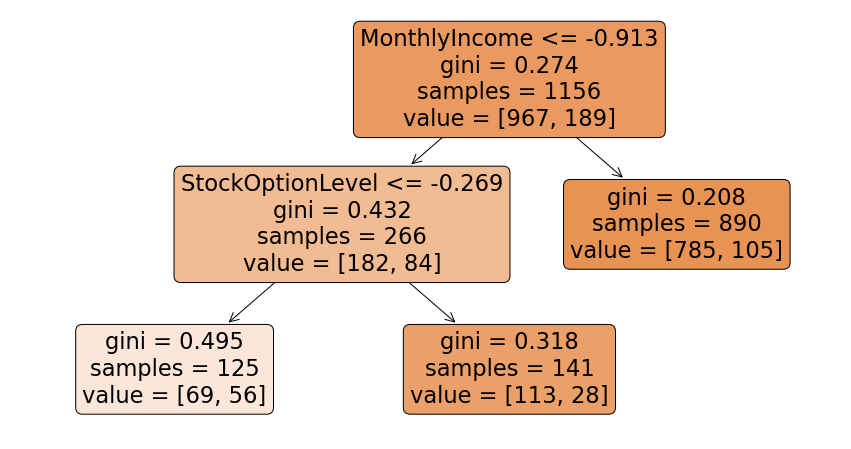

In [123]:
plt.figure(figsize=(15,8))
plot_tree(dt, filled=True , rounded=True , 
          feature_names=HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].columns)

In [92]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score , classification_report


In [89]:
pred_train=dt.predict(train_x)
print(confusion_matrix(pred_train, train_y, labels=[1,0]))
print(accuracy_score(train_y, pred_train))

[[189   0]
 [  0 967]]
1.0


In [91]:
pred=dt.predict(test_x)
print(confusion_matrix(pred, test_y, labels=[1,0]))
print(accuracy_score(test_y, pred))

[[ 22  45]
 [ 22 200]]
0.7681660899653979


In [99]:
dt.score(train_x, train_y)

0.8365051903114187

### pruining tree

In [93]:
path=dt.cost_complexity_pruning_path(train_x,train_y)
ccp_alphas=path.ccp_alphas

In [95]:
ccp_alphas=ccp_alphas[:-1]

In [96]:
##creating different dt's for different alphas
dtrees=[]
for a in ccp_alphas:
    dt=DecisionTreeClassifier(ccp_alpha=a)
    dt.fit(train_x, train_y)
    dtrees.append(dt)

In [100]:
train_scores=[tree.score(train_x, train_y) for tree in dtrees]
test_scores=[tree.score(test_x, test_y) for tree in dtrees]

In [107]:
train_scores=[accuracy_score( train_y, tree.predict(train_x)) for tree in dtrees]
test_scores=[accuracy_score( test_y, tree.predict(test_x)) for tree in dtrees]

Text(0, 0.5, 'accuracy')

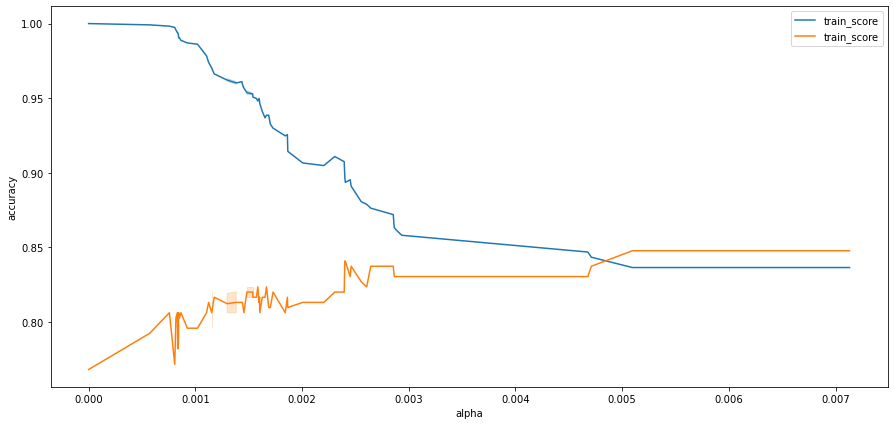

In [108]:
plt.figure(figsize=(15,7))
sb.lineplot(x=ccp_alphas , y=train_scores, label="train_score")
sb.lineplot(x=ccp_alphas , y=test_scores, label="train_score")
plt.xlabel('alpha')
plt.ylabel('accuracy')


In [119]:
dt_pruned=DecisionTreeClassifier(ccp_alpha=0.0049)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt_pruned , X_sscaled, Y , cv=5, scoring='accuracy')
print(scores,np.mean(scores),np.std(scores))

[0.816609   0.83391003 0.84083045 0.82698962 0.816609  ] 0.8269896193771625 0.009539134084491521


In [120]:
dt_pruned.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0049)

In [121]:
confusion_matrix(dt_pruned.predict(test_x),test_y,labels=[1,0])

array([[  2,   5],
       [ 42, 240]], dtype=int64)

[Text(418.5, 747.4499999999999, 'MonthlyIncome <= -0.913\ngini = 0.274\nsamples = 1156\nvalue = [967, 189]\nclass = no'),
 Text(209.25, 611.55, 'StockOptionLevel <= -0.269\ngini = 0.432\nsamples = 266\nvalue = [182, 84]\nclass = no'),
 Text(104.625, 475.65, 'gini = 0.495\nsamples = 125\nvalue = [69, 56]\nclass = no'),
 Text(313.875, 475.65, 'gini = 0.318\nsamples = 141\nvalue = [113, 28]\nclass = no'),
 Text(627.75, 611.55, 'StockOptionLevel <= -0.269\ngini = 0.208\nsamples = 890\nvalue = [785, 105]\nclass = no'),
 Text(523.125, 475.65, 'JobRole <= 0.818\ngini = 0.304\nsamples = 374\nvalue = [304, 70]\nclass = no'),
 Text(418.5, 339.74999999999994, 'JobSatisfaction <= -1.118\ngini = 0.224\nsamples = 249\nvalue = [217, 32]\nclass = no'),
 Text(313.875, 203.8499999999999, 'MonthlyIncome <= -0.196\ngini = 0.426\nsamples = 39\nvalue = [27, 12]\nclass = no'),
 Text(209.25, 67.94999999999993, 'gini = 0.278\nsamples = 12\nvalue = [2, 10]\nclass = yes'),
 Text(418.5, 67.94999999999993, 'gini =

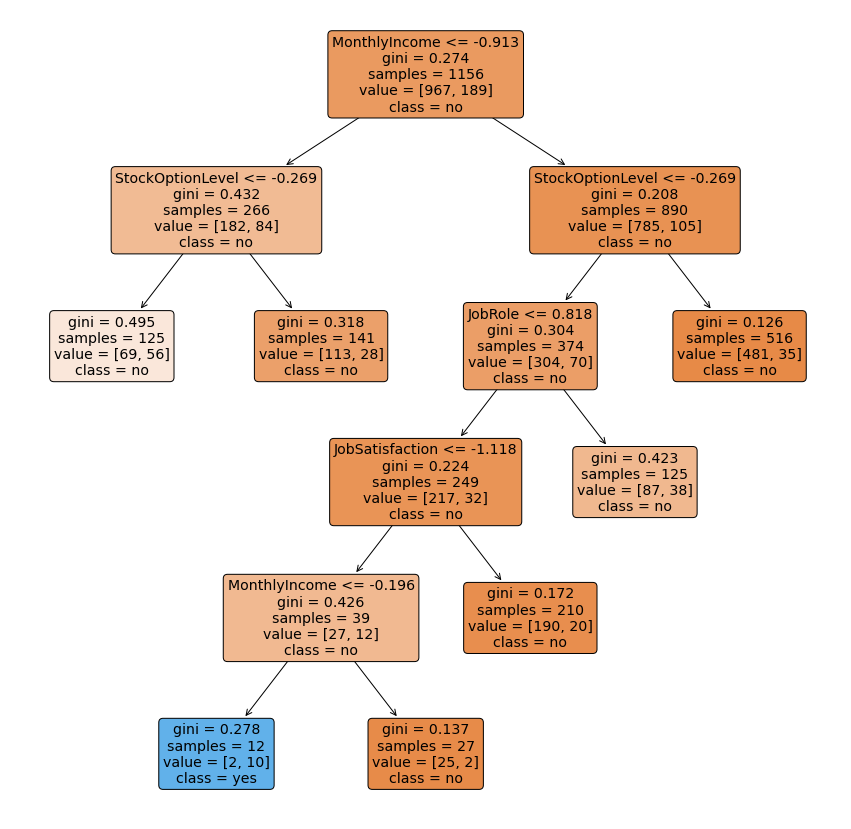

In [137]:
plt.figure(figsize=(15,15))
plot_tree(dt_pruned, filled=True, rounded=True ,class_names=["no","yes"],feature_names=HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].columns)

### Model Preparation:

In [119]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [120]:
# preparing a method to get metrices at best random state
def classification_bestrandomstate(x,y,test_size,model):
    max=0
    ind=0
    for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i,stratify=y)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind,stratify=y)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Best Accuracy score :\n',accuracy_score(test_y,pred),'at random state',ind)
    print('\nclassification_report :\n',classification_report(test_y,pred))
    false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,pred)
    roc_auc=auc( false_positive_rate,true_positive_rate)
    print('\nroc_auc_score :\n',roc_auc)
    acc_score.append(accuracy_score(test_y,pred))
    roc_score.append(roc_auc)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(model)
    print(sb.heatmap(confusion_matrix(test_y,pred),annot=True))
    plt.subplot(912)
    plt.title('roc_auc')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend('lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print('\n\n')

$$$$$$$$$$$$$$$ LogisticRegression $$$$$$$$$$$$$$
Best Accuracy score :
 0.8788927335640139 at random state 54

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       242
           1       0.88      0.30      0.44        47

    accuracy                           0.88       289
   macro avg       0.88      0.64      0.69       289
weighted avg       0.88      0.88      0.85       289


roc_auc_score :
 0.6448039388078073
AxesSubplot(0.125,0.808774;0.62x0.0712264)



$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$
Best Accuracy score :
 0.8512110726643599 at random state 44

classification_report :
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       242
           1       0.83      0.11      0.19        47

    accuracy                           0.85       289
   macro avg       0.84      0.55      0.55       289
weighted avg       0.85      0.85      0.80       289

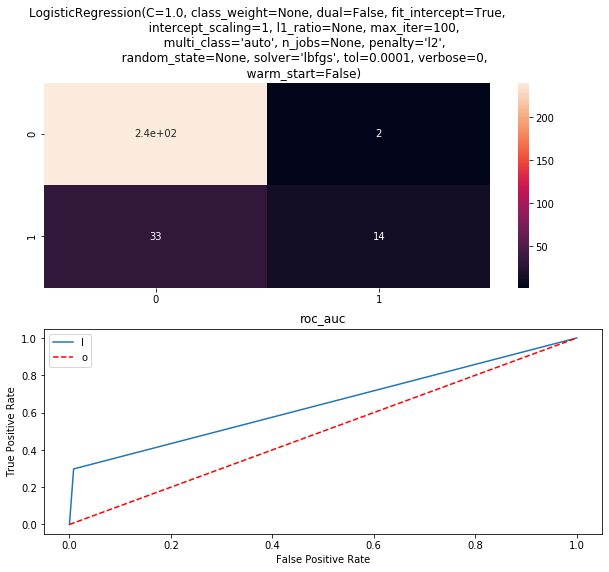

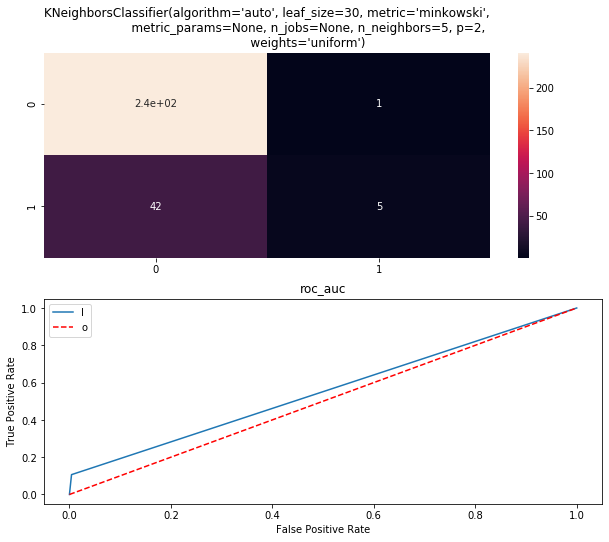

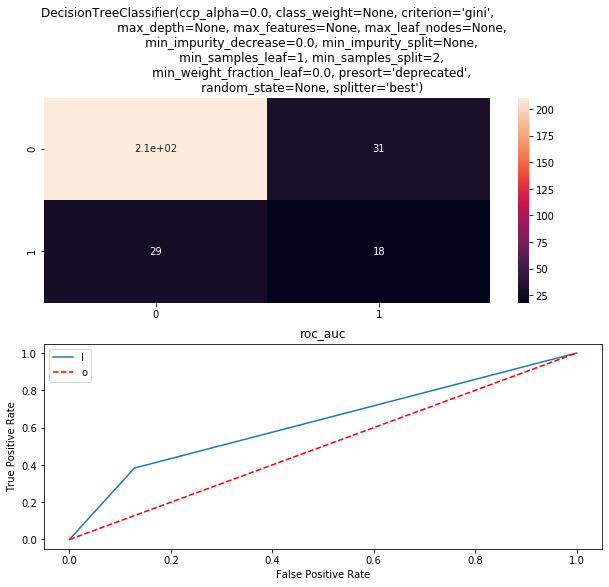

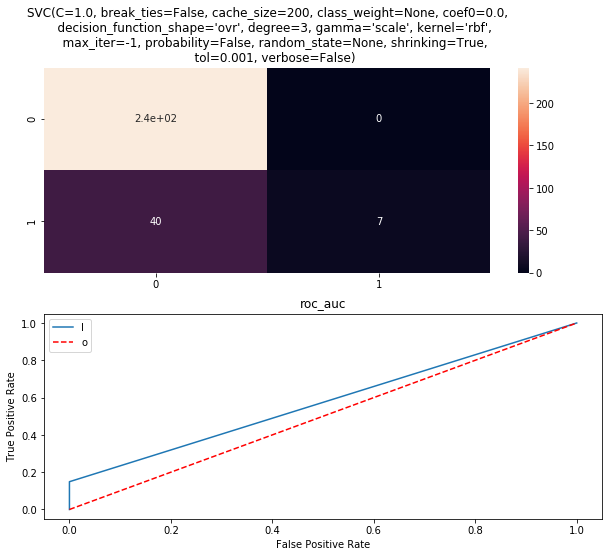

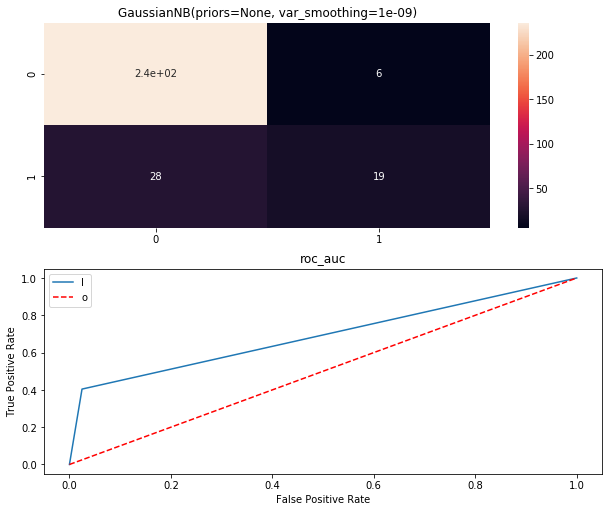

In [121]:
acc_score=[]
roc_score=[]
models=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),GaussianNB()]
for i,k in zip(models,['LogisticRegression','KNeighbor','DecisionTree','SVC','GaussianNB']):
    print('$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$')
    classification_bestrandomstate(X_sscaled,Y,0.2,i)
    

In [122]:
pd.DataFrame([acc_score,roc_score],index=['Accuracy_score','Auc_roc_score'],columns=['LogisticRegression','KNeighbor','DecisionTree','SVC','GaussianNB'])

,LogisticRegression,KNeighbor,DecisionTree,SVC,GaussianNB
Accuracy_score,0.878893,0.851211,0.792388,0.861592,0.882353
Auc_roc_score,0.644804,0.551125,0.627440,0.574468,0.689731


In [123]:
hr_data.groupby('Attrition').count()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233,...,1233,1233,1233,1233,1233,1233,1233,1233,1233,1233
Yes,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


### Here we can see that Attrition -1(yes) is less in number than Not Atrrition - 0(No) which concludes that dataset is imbalanced which means we should not go with evaluation metric 'Accuracy score' instead work on precision and recall 

### Problem --  Attrition and factors causing it 

### conclusion from problem:-

### -->Recall should be as high as possible which means False negative should be as low as possible not disturbing the precision

### --> Means the number of times our model predict as 'Not Attrition' when there is actually Attrition should be low

### Considering all above points LogisticRegression is performing best

In [124]:
#checking cross val score:
cross_val_score(LogisticRegression(),X_sscaled,Y,cv=5,scoring='f1_macro').mean()

0.6323659266673509

Logistic Regression is not overfitted / underfitted

### Trying Ensemble techniques:

In [125]:
#preparing a method to perform hyperparameter tuning and cross validation :
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
def gridsearch(x,y,model,parameter_dictionary):
    #kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
    scoring=['accuracy','roc_auc','average_precision','f1_macro']
    for i in scoring:
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=5,scoring=i)
        grid_cv.fit(x,y)
        if(i=='accuracy'):
            print('\n')   
            print('mean accuracy_score :',grid_cv.best_score_)
            #cv_r2score.append(grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='roc_auc'):
            print('\n')   
            print('mean roc_auc :',grid_cv.best_score_)
            #cv_r2score.append(grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='precision'):
            print('\n')
            print('mean precision_score:',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='recall'):
            print('\n')
            print('mean precision_score:',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)
        if(i=='f1_macro'):
            print('\n')
            print('macro avg f1_score:',grid_cv.best_score_)
            print('best Parameter :',grid_cv.best_params_)

In [126]:
gridsearch(X_sscaled,Y,RandomForestClassifier(),{'n_estimators': [50,100,150,200],'criterion':['gini','entropy']})



mean accuracy_score : 0.8512110726643598
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


mean roc_auc : 0.7613189331715949
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


macro avg f1_score: 0.563014233545829
best Parameter : {'criterion': 'gini', 'n_estimators': 150}


In [127]:
gridsearch(X_sscaled,Y,AdaBoostClassifier(base_estimator=LogisticRegression()),{'n_estimators': [50,100,150,200]})



mean accuracy_score : 0.855363321799308
best Parameter : {'n_estimators': 100}


mean roc_auc : 0.7698403817214496
best Parameter : {'n_estimators': 50}


macro avg f1_score: 0.6298367991959181
best Parameter : {'n_estimators': 100}


In [128]:
gridsearch(X_mmscaled,Y,GradientBoostingClassifier(),{'n_estimators': [50,100,150,200]})



mean accuracy_score : 0.8519031141868512
best Parameter : {'n_estimators': 150}


mean roc_auc : 0.7562942267433993
best Parameter : {'n_estimators': 100}


macro avg f1_score: 0.6398677070764621
best Parameter : {'n_estimators': 200}


### Observation: GradientBoostingClassifier is working well in all ensemble technique with mean F1_score of 37%

Best Accuracy score :
 0.8754325259515571 at random state 78

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       242
           1       0.76      0.34      0.47        47

    accuracy                           0.88       289
   macro avg       0.82      0.66      0.70       289
weighted avg       0.86      0.88      0.85       289


roc_auc_score :
 0.6598821874450501
AxesSubplot(0.125,0.808774;0.62x0.0712264)





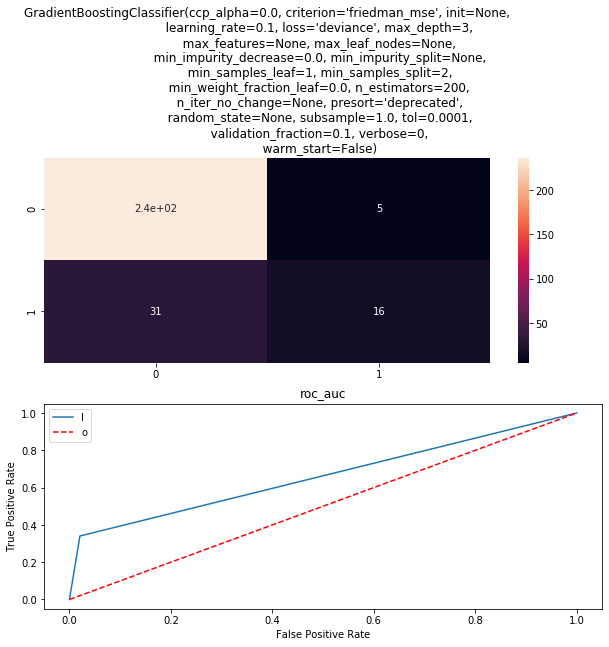

In [129]:
#finding best state for GradientBoosting classifier
classification_bestrandomstate(X_sscaled,Y,0.2,GradientBoostingClassifier(n_estimators=200))

## Finalizing the model:

In [130]:
from sklearn.metrics import f1_score
model=GradientBoostingClassifier(n_estimators=200)
train_x,test_x,train_y,test_y=train_test_split(X_sscaled,Y,test_size=0.2,random_state=64,stratify=Y)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('\nclassification_report :\n',classification_report(test_y,pred))
print(model.feature_importances_)
print(model.n_features_)


classification_report :
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       242
           1       0.73      0.40      0.52        47

    accuracy                           0.88       289
   macro avg       0.81      0.69      0.73       289
weighted avg       0.87      0.88      0.86       289

[0.08859551 0.02778977 0.06311139 0.00167539 0.04697644 0.00449472
 0.01936494 0.03238663 0.00340251 0.05640467 0.03981709 0.04926133
 0.04250846 0.02890735 0.18108088 0.07723636 0.03687956 0.02380818
 0.05427697 0.03613101 0.04066993 0.0452209 ]
22


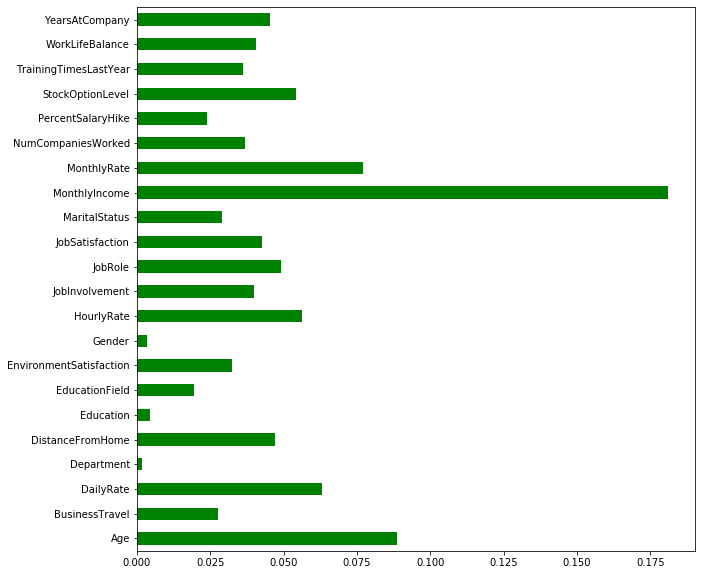

In [131]:
#checking importances of each feature in Attrition as per model
plt.figure(figsize=(10,10))
series=pd.Series(model.feature_importances_, index=HRdata_no_outliers.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]].columns)
series.plot(kind='barh',color='green')

### Observation: Monthly income is most important factor in Attrition followed by Age

In [132]:
from sklearn.externals import joblib
joblib.dump(model,'model_HRAnalytics')

['model_HRAnalytics']